# Franchise Launching Strategy: Baskin-Robbins and Dunkin'

In [90]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [91]:
df = pd.read_csv("seoul_store_info.csv", sep='|')
df.shape

(573680, 39)

### Missing Data Handling and Data Preprocessing

In [92]:
# This page analyzes a same dataset from "Commercial District Analysis.ipynp". 
# Therefore, data preprocessing part follows exactly same steps from "Commercial District Analysis.ipynp".
# Please check "Commercial District Analysis.ipynp" to see step by step instruction for this proecess!!

n = df.isnull().sum()
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
df = df.drop(not_use_col, axis=1)
cols = df.columns
cols_code = cols[cols.str.contains("코드|번호")]
cols_code
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)
df = df[["상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명", "시도명", "시군구명", "도로명주소", "경도", "위도"]]
df = df.rename(columns={"상호명":"Store Name","상권업종대분류명":"Business Type","상권업종중분류명":"Subtype","상권업종소분류명":"Specialty", "시도명":"City", "시군구명":"District", "도로명주소":"Address", "경도":"Longitude", "위도":"Latitude"})

# Business Type
df.loc[df["Business Type"].str.contains("음식"), "Business Type"] = "Restaurant"
df.loc[df["Business Type"].str.contains("생활서비스"), "Business Type"] = "Service"
df.loc[df["Business Type"].str.contains("소매"), "Business Type"] = "Retail"
df.loc[df["Business Type"].str.contains("의료"), "Business Type"] = "Hospital/Pharmacy"
df.loc[df["Business Type"].str.contains("학문"), "Business Type"] = "Education"
df.loc[df["Business Type"].str.contains("관광"), "Business Type"] = "Leisure/Travel/Entertainment"
df.loc[df["Business Type"].str.contains("부동산"), "Business Type"] = "Finance"
df.loc[df["Business Type"].str.contains("숙박"), "Business Type"] = "Hotel"
df.loc[df["Business Type"].str.contains("스포츠"), "Business Type"] = "Sports Centre"

# Subtype(Food)
df.loc[df["Subtype"].str.contains("유흥주점"), "Subtype"] = "Bar/Liquor Store"
df.loc[df["Subtype"].str.contains("커피점/카페"), "Subtype"] = "Caffe/Tea"
df.loc[df["Subtype"].str.contains("패스트푸드"), "Subtype"] = "Fast Food"
df.loc[df["Subtype"].str.contains("일식/수산물"), "Subtype"] = "Japanese/Seafood"
df.loc[df["Subtype"].str.contains("분식"), "Subtype"] = "Snack"
df.loc[df["Subtype"].str.contains("한식"), "Subtype"] = "Korean Food"
df.loc[df["Subtype"].str.contains("양식"), "Subtype"] = "Western/Italian"
df.loc[df["Subtype"].str.contains("중식"), "Subtype"] = "Chinese/Hong Kong"
df.loc[df["Subtype"].str.contains("별식"), "Subtype"] = "Fusion"
df.loc[df["Subtype"].str.contains("닭"), "Subtype"] = "Chicken"
df.loc[df["Subtype"].str.contains("Restaurant"), "Subtype"] = "Family Restaurant"
df.loc[df["Subtype"].str.contains("제과제빵떡케익"), "Subtype"] = "Bread/Cake/Cookie"
df.loc[df["Subtype"].str.contains("부페"), "Subtype"] = "Buffet"
df.loc[df["Specialty"].str.contains("도너츠"), "Specialty"] = "Donuts"
df.loc[df["Specialty"].str.contains("아이스크림"), "Specialty"] = "Ice Cream"

# City
df.loc[df["City"].str.contains("서울특별시"), "City"] = "Seoul"
df.loc[df["City"].str.contains("부산광역시"), "City"] = "Busan"

# District
df.loc[df["District"].str.contains("종로구"), "District"] = "Jongno-gu"
df.loc[df["District"].str.contains("중구"), "District"] = "Jung-gu"
df.loc[df["District"].str.contains("용산구"), "District"] = "Yongsan-gu"
df.loc[df["District"].str.contains("성동구"), "District"] = "Seongdong-gu"
df.loc[df["District"].str.contains("광진구"), "District"] = "Gwangjin-gu"
df.loc[df["District"].str.contains("동대문구"), "District"] = "Dongdaemun-gu"
df.loc[df["District"].str.contains("중랑구"), "District"] = "Jungnang-gu"
df.loc[df["District"].str.contains("성북구"), "District"] = "Seongbuk-gu"
df.loc[df["District"].str.contains("강북구"), "District"] = "Gangbuk-gu"
df.loc[df["District"].str.contains("도봉구"), "District"] = "Dobong-gu"
df.loc[df["District"].str.contains("노원구"), "District"] = "Nowon-gu"
df.loc[df["District"].str.contains("은평구"), "District"] = "Eunpyeong-gu"
df.loc[df["District"].str.contains("서대문구"), "District"] = "Seodaemun-gu"
df.loc[df["District"].str.contains("마포구"), "District"] = "Mapo-gu"
df.loc[df["District"].str.contains("양천구"), "District"] = "Yangcheon-gu"
df.loc[df["District"].str.contains("강서구"), "District"] = "Gangseo-gu"
df.loc[df["District"].str.contains("구로구"), "District"] = "Guro-gu"
df.loc[df["District"].str.contains("금천구"), "District"] = "Geumcheon-gu"
df.loc[df["District"].str.contains("영등포구"), "District"] = "Yeongdeungpo-gu"
df.loc[df["District"].str.contains("동작구"), "District"] = "Dongjak-gu"
df.loc[df["District"].str.contains("관악구"), "District"] = "Gwanak-gu"
df.loc[df["District"].str.contains("서초구"), "District"] = "Seocho-gu"
df.loc[df["District"].str.contains("강남구"), "District"] = "Gangnam-gu"
df.loc[df["District"].str.contains("송파구"), "District"] = "Songpa-gu"
df.loc[df["District"].str.contains("강동구"), "District"] = "Gangdong-gu"
df.loc[df["District"].str.contains("타시도|기타"), "District"] = "Another City"

(573680, 30)
(573680, 16)


In [93]:
df_seoul = df[df["City"] == "Seoul"].copy()
df_seoul.head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude
0,와라와라호프,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Gangnam-gu,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,Restaurant,Caffe/Tea,커피전문점/카페/다방,Seoul,Gangnam-gu,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,Restaurant,Bar/Liquor Store,호프/맥주,Seoul,Geumcheon-gu,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,Service,대중목욕탕/휴게,사우나/증기탕/온천,Seoul,Songpa-gu,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,Restaurant,Japanese/Seafood,음식점-초밥전문,Seoul,Songpa-gu,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


### Save Filtered Data as .csv

In [94]:
# save as "seoul_open_stores.csv"
df_seoul.to_csv("seoul_open_stores.csv", index=False)

## 1. Text Data Analysis

In [95]:
# Korean to English Translation:
# 배스킨라빈스  =>  Baskin-Robbins
# 던킨 도너츠  =>  Dunkin'

df_seoul["Store Name (lower)"] = df_seoul["Store Name"].str.lower()
baskin = df_seoul.loc[df_seoul["Store Name (lower)"].str.contains("(베|배)스킨라빈스|baskinrobbins")].copy()
baskin.head()

/Users/bagbyeongseon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude,Store Name (lower)
76,배스킨라빈스,Restaurant,Fast Food,Ice Cream,Seoul,Gwanak-gu,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
2164,베스킨라빈스,Restaurant,Fast Food,Ice Cream,Seoul,Mapo-gu,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스
11060,베스킨라빈스은행나무점,Restaurant,Fast Food,Ice Cream,Seoul,Geumcheon-gu,서울특별시 금천구 금하로 726-1,126.910405,37.450433,베스킨라빈스은행나무점
13953,배스킨라빈스,Restaurant,Fast Food,Ice Cream,Seoul,Gangnam-gu,서울특별시 강남구 강남대로 390,127.028565,37.497832,배스킨라빈스
14201,베스킨라빈스,Restaurant,Fast Food,Ice Cream,Seoul,Gwangjin-gu,서울특별시 광진구 아차산로 494,127.096667,37.541145,베스킨라빈스


In [96]:
dunkin = df_seoul.loc[df_seoul["Store Name (lower)"].str.contains("던킨|dunkin")].copy()
dunkin.head()

,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude,Store Name (lower)
1167,던킨도너츠,Restaurant,Fast Food,Donuts,Seoul,Seodaemun-gu,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,Restaurant,Fast Food,Donuts,Seoul,Gwangjin-gu,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점
2305,던킨도너츠창동하나로,Restaurant,Fast Food,Donuts,Seoul,Dobong-gu,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠창동하나로
2342,던킨도너츠용산민자역사2호,Restaurant,Fast Food,Donuts,Seoul,Yongsan-gu,서울특별시 용산구 한강대로21나길 7,126.963223,37.527903,던킨도너츠용산민자역사2호
3007,던킨도너츠,Restaurant,Fast Food,Donuts,Seoul,Songpa-gu,서울특별시 송파구 석촌호수로 118,127.090005,37.507431,던킨도너츠


In [97]:
df_baskin_dunkin = df_seoul.loc[df_seoul["Store Name (lower)"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins|던킨|dunkin")].copy()
df_baskin_dunkin.shape

(657, 10)

In [98]:
df_baskin_dunkin.loc[df_baskin_dunkin["Store Name (lower)"].str.contains("(베|배)스킨라빈스|baskinrobbins"),
                    "Franchise"] = "Baskin-Robbins"
df_baskin_dunkin.loc[df_baskin_dunkin["Store Name (lower)"].str.contains("던킨|dunkin"),
                    "Franchise"] = "Dunkin'"
df_baskin_dunkin[["Store Name", "Franchise"]]

/Users/bagbyeongseon/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Store Name,Franchise
76,배스킨라빈스,Baskin-Robbins
1167,던킨도너츠,Dunkin'
1819,던킨도너츠테크노마트점,Dunkin'
2164,베스킨라빈스,Baskin-Robbins
2305,던킨도너츠창동하나로,Dunkin'
...,...,...
558894,DUNKINDOONUTS,Dunkin'
560984,던킨도너츠,Dunkin'
561929,배스킨라빈스31,Baskin-Robbins
561930,배스킨라빈스31,Baskin-Robbins


In [99]:
# filter wrongly collected business type; using same store name, but not food franchise
print(df_baskin_dunkin["Business Type"].value_counts())
df_baskin_dunkin[df_baskin_dunkin["Business Type"].isin(["Retail","Service"])]

Restaurant    655
Retail          1
Service         1
Name: Business Type, dtype: int64


,Store Name,Business Type,Subtype,Specialty,City,District,Address,Longitude,Latitude,Store Name (lower),Franchise
358699,배스킨라빈스,Retail,종합소매점,할인점,Seoul,Gangnam-gu,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,Baskin-Robbins
556592,baskinrobbins,Service,광고/인쇄,인쇄종합,Seoul,Gangnam-gu,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,Baskin-Robbins


In [100]:
df_baskin_dunkin = df_baskin_dunkin[~df_baskin_dunkin["Business Type"].isin(["Retail","Service"])]
df_baskin_dunkin.shape

(655, 11)

## 2. Visualization

### Count Plot by Categorical Data

In [101]:
# number
br_count = df_baskin_dunkin["Franchise"].value_counts()
br_count

Baskin-Robbins    464
Dunkin'           191
Name: Franchise, dtype: int64

In [102]:
# fraction
df_baskin_dunkin["Franchise"].value_counts(normalize=True)

Baskin-Robbins    0.708397
Dunkin'           0.291603
Name: Franchise, dtype: float64

<AxesSubplot:>

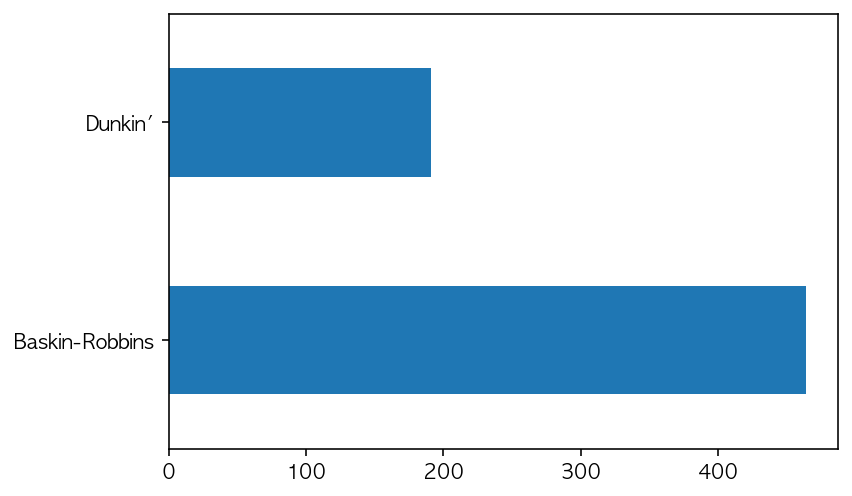

In [103]:
df_baskin_dunkin["Franchise"].value_counts().plot.barh()

Text(1, 191, '191')

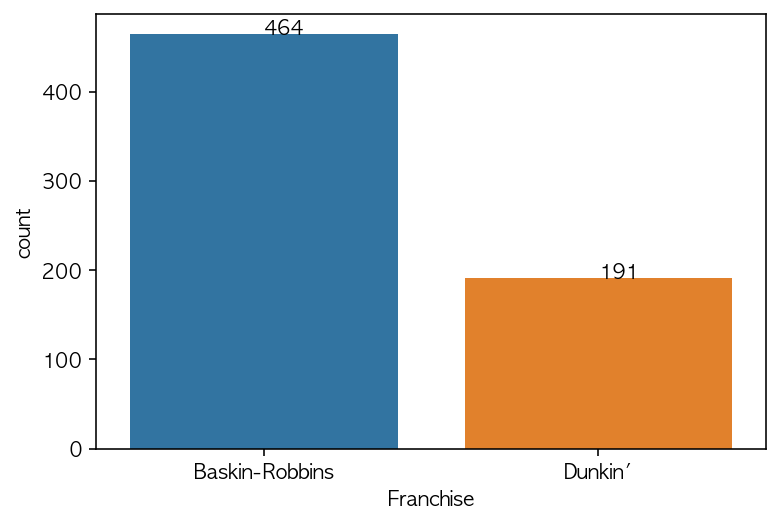

In [104]:
# seaborn
g = sb.countplot(data=df_baskin_dunkin, x="Franchise")
g.text(x=0,y=br_count[0],s=br_count[0])
g.text(x=1,y=br_count[1],s=br_count[1])

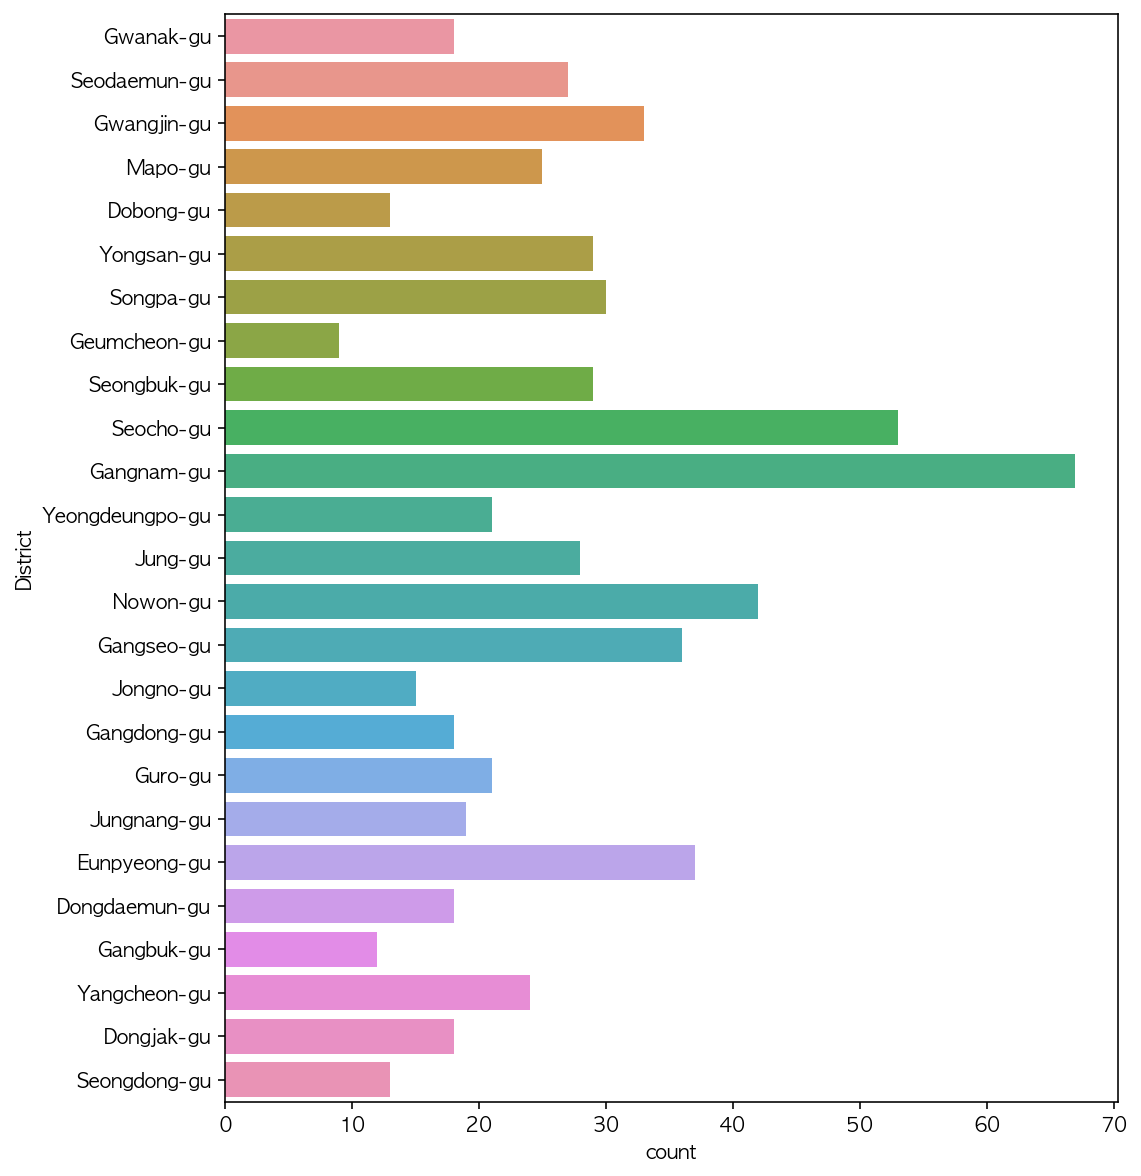

In [105]:
plt.figure(figsize=(8,10))
g = sb.countplot(data=df_baskin_dunkin, y="District")

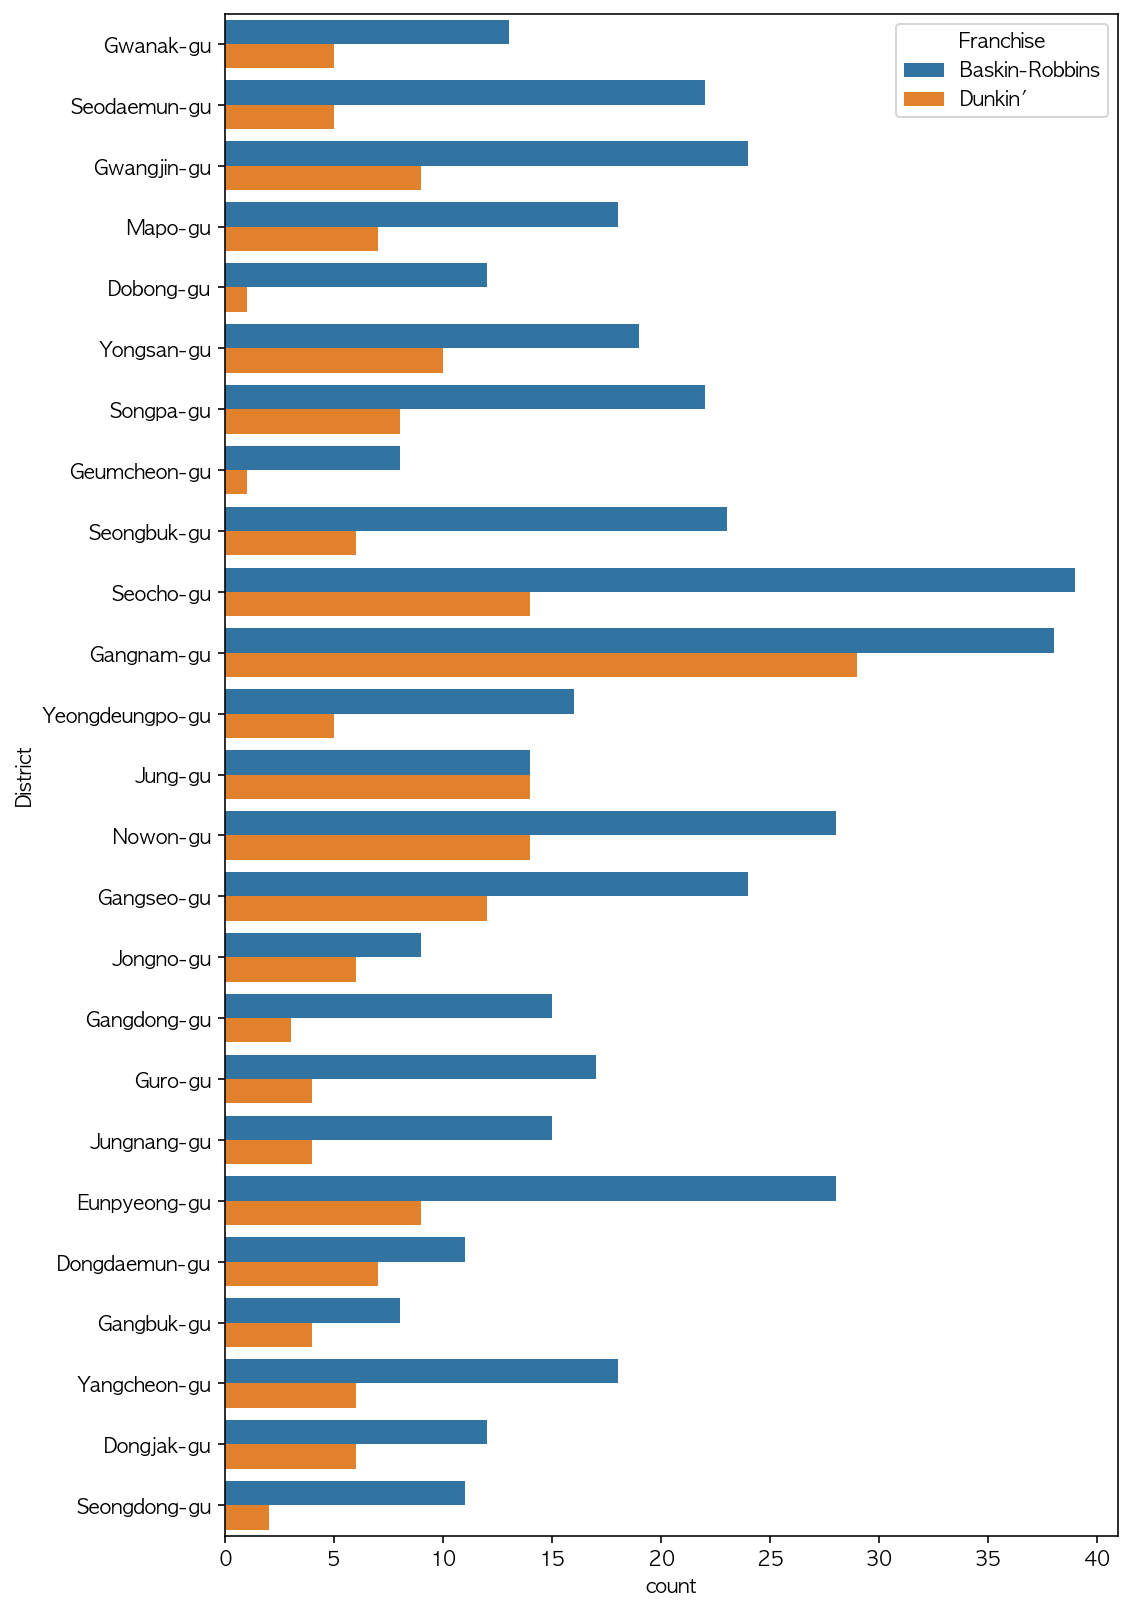

In [106]:
plt.figure(figsize=(8,14))
g = sb.countplot(data=df_baskin_dunkin, y="District", hue="Franchise")

### Scatter Plot

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

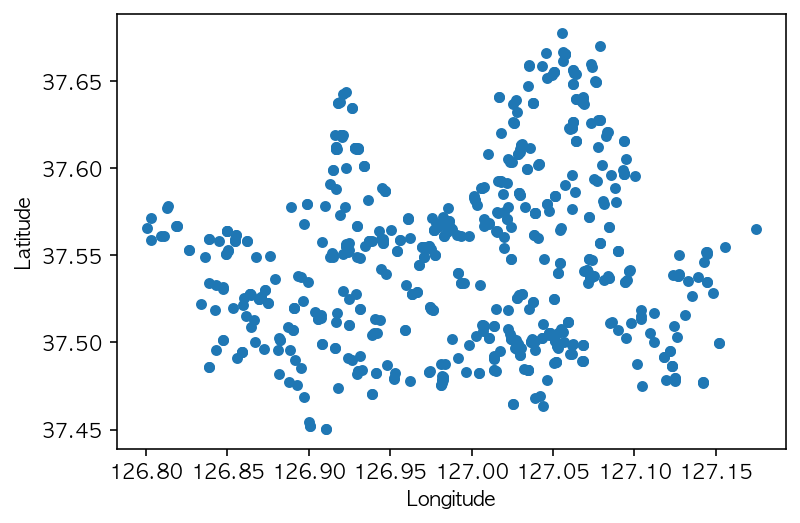

In [107]:
df_baskin_dunkin[["Latitude","Longitude"]].plot.scatter(x="Longitude",y="Latitude")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

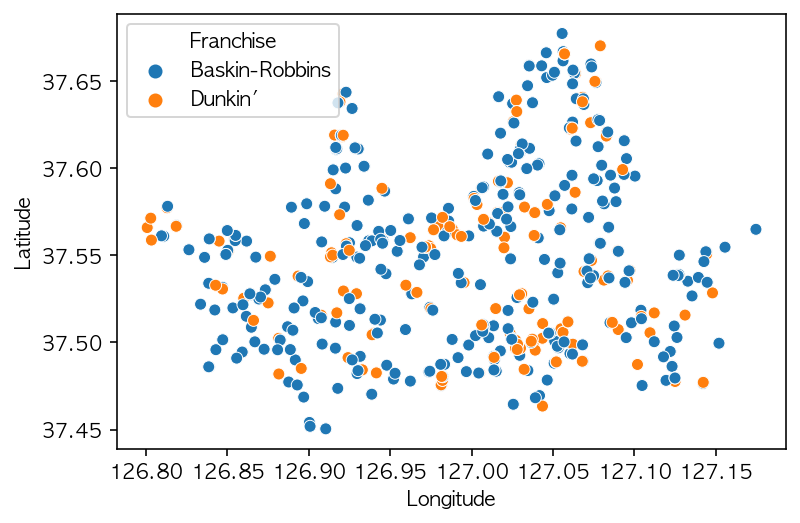

In [108]:
sb.scatterplot(data=df_baskin_dunkin, x="Longitude", y="Latitude", hue="Franchise")

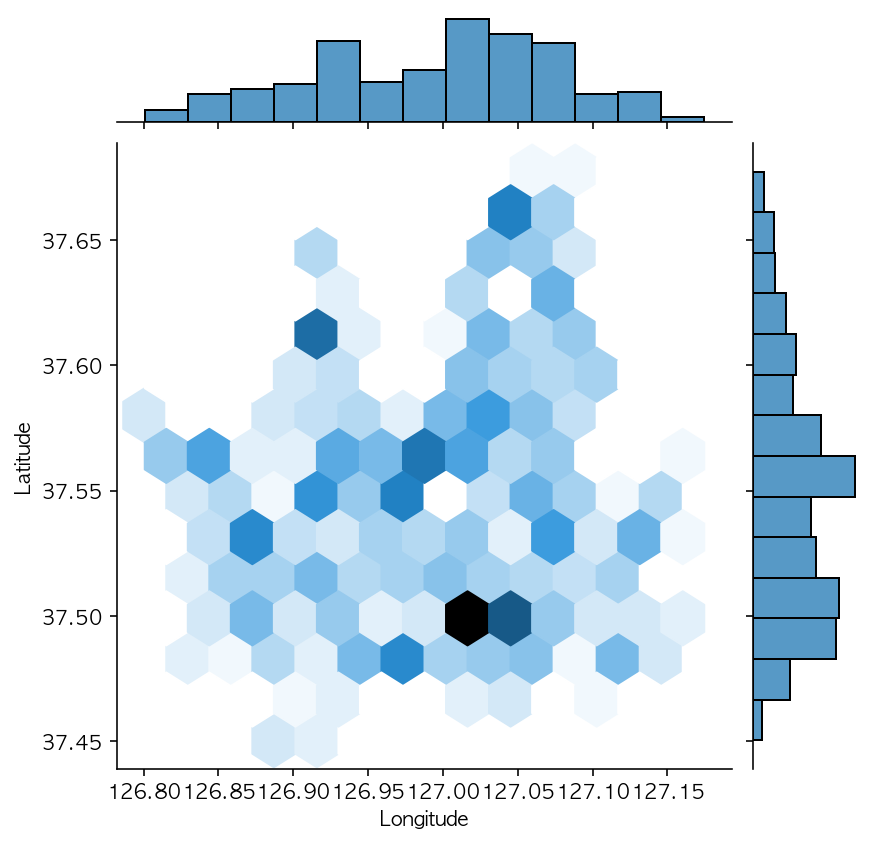

In [109]:
sb.jointplot(data=df_baskin_dunkin,x="Longitude",y="Latitude", kind="hex")

## 3. Folium Library

In [110]:
import folium 

In [113]:
long = df_baskin_dunkin["Longitude"].mean()
lat = df_baskin_dunkin["Latitude"].mean()

In [131]:
m = folium.Map([lat, long])

for i in df_baskin_dunkin.index[:200]:
    sub_lat = df_baskin_dunkin.loc[i, "Latitude"]
    sub_long = df_baskin_dunkin.loc[i, "Longitude"]
    title = df_baskin_dunkin.loc[i, "Franchise"]
    
    icon_color = "red"
    if df_baskin_dunkin.loc[i, "Franchise"] == 'Baskin-Robbins':
        icon_color = "blue"
        
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=icon_color), tooltip=title).add_to(m)
    
m

'Baskin-Robbins'

In [134]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)


for i in df_baskin_dunkin.index:
    sub_lat = df_baskin_dunkin.loc[i, "Latitude"]
    sub_long = df_baskin_dunkin.loc[i, "Longitude"]
    title = df_baskin_dunkin.loc[i, "Franchise"]
    
    icon_color = "red"
    if df_baskin_dunkin.loc[i, "Franchise"] == 'Baskin-Robbins':
        icon_color = "blue"
        
    folium.Marker([sub_lat,sub_long], icon=folium.Icon(color=icon_color), tooltip=title).add_to(marker_cluster)
    
m